## Description

The cost of some drugs and medical treatments has risen so high in recent years that many patients are having to go without. You can help with a classification project that could make researchers more efficient.

One of the more surprising reasons behind the cost is how long it takes to bring new treatments to market. Despite improvements in technology and science, research and development continues to lag. In fact, finding new treatments takes, on average, more than 10 years and costs hundreds of millions of dollars.

Recursion Pharmaceuticals, creators of the industry’s largest dataset of biological images, generated entirely in-house, believes AI has the potential to dramatically improve and expedite the drug discovery process. More specifically, your efforts could help them understand how drugs interact with human cells.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
print(os.listdir('/kaggle/input/'))
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     print(dirname)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

print(os.listdir('/kaggle/input/train/HUVEC-06/'))

['test', 'pixel_stats.csv', 'sample_submission.csv', 'test.csv', 'recursion_dataset_license.pdf', 'test_controls.csv', 'train_controls.csv', 'train.csv', 'train']
['Plate1', 'Plate3', 'Plate4', 'Plate2']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: This function is deprecated. Please call randint(1, 3000 + 1) instead
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 3696 + 1) instead
  if __name__ == '__main__':


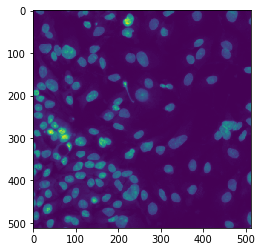

In [2]:
# img = mpimg.imread('/kaggle/input/train/HUVEC-06/Plate1/O16_s2_w6.png')
# plt.imshow(img)
import csv
df = pd.read_csv('/kaggle/input/train.csv')
df.head()
num = np.random.random_integers(3000)
path = '/kaggle/input/train/' + df['experiment'][num] + '/Plate' + str(df['plate'][num]) + '/'
_ = os.listdir(path)
img = mpimg.imread(path + _[np.random.random_integers(len(_))])
# img[np.where(img<0.1)] = 0.1
plt.imshow(img)

In [3]:
# ! pip install --upgrade tensorflow==2.0.0-beta1
# ! pip install --upgrade tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(tf.__version__)

1.14.0


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(33,activation='softmax')
])

history = model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.00001), 
                        # loss='categorical_crossentropy', metrics=['acc'])
                        loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [8]:
TRAINING_DIR = '/kaggle/input/train/'

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    batch_size=100,
                                                    class_mode='sparse',
                                                    target_size=(150,150)
)

VALIDATION_DIR = '/kaggle/input/test/'
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                    batch_size=100,
                                                    class_mode='sparse',
                                                    target_size=(150,150)
)



Found 487344 images belonging to 33 classes.
Found 265716 images belonging to 18 classes.


In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=2,
                              epochs=15, 
                              verbose=1, 
                              validation_data=validation_generator
)

Epoch 1/15
1/2 [==============>...............] - ETA: 2s - loss: 3.4191 - acc: 0.0100

In [ ]:
train_acc = history.history['acc']
valid_acc = history.history['val_acc']